In [1]:
import pandas as pd
from collections import Counter
import json

In [2]:
file_path = "../data/news_with_tokenized_keywords.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# 📌 4. 데이터프레임 변환
df = pd.DataFrame(data)

In [3]:
df

,title,link,date,content,source,quarter,cleaned_content,tokenized_content,keywords,bigrams,trigrams
0,朝鲜试射导弹亚太骤起波澜,https://www.gmw.cn/01gmrb/2006-07/12/content_4...,2006-07-12,7月5日，朝鲜连续发射7枚导弹，引起国际社会震惊。近日，美日在安理会积极推动制裁朝鲜的议案，...,光明网,2006Q3,7月5日朝鲜连续发射7枚导弹引起国际社会震惊。近日美日在安理会积极推动制裁朝鲜的议案并加紧协...,7月 5日 朝鲜 连续 发射 7 枚 导弹 引起 国际 社会 震惊 。 美 日 安理会 积极...,"[[朝鲜, 0.3875], [导弹, 0.3606], [发射, 0.2858], [制裁...","[[朝鲜, 导弹], [导弹, 发射], [发射, 制裁], [制裁, 日本], [日本, ...","[[朝鲜, 导弹, 发射], [导弹, 发射, 制裁], [发射, 制裁, 日本], [制裁..."
1,美朝关系开始解冻,https://www.gmw.cn/01gmrb/2007-03/08/content_5...,2007-03-08,被外界视为“破冰之旅”的朝鲜副外相金桂冠3月5至6日在纽约与美国助理国务卿希尔就两国关系正常...,光明网,2007Q1,被外界视为破冰之旅的朝鲜副外相金桂冠3月5至6日在纽约与美国助理国务卿希尔就两国关系正常化进...,外界 视为 破冰 之 旅 朝鲜 副外相 金桂冠 3月 5 6日 纽约 美国 助理 国务卿 希...,"[[会谈, 0.5007], [朝鲜, 0.2852], [关系, 0.2421], [美元...","[[会谈, 朝鲜], [朝鲜, 关系], [关系, 美元], [美元, 美国], [美国, ...","[[会谈, 朝鲜, 关系], [朝鲜, 关系, 美元], [关系, 美元, 美国], [美元..."
2,美日韩间谍云集朝鲜周边空中侦察地面窃听 - 国际经济,http://intl.ce.cn/zj/200809/19/t20080919_16855...,2008-09-19,神秘，这是朝鲜留给外界的印象。 正因为神秘，一些国家的情报机构费尽心机，通过投放卫星、派遣侦...,中国经济网,2008Q3,神秘这是朝鲜留给外界的印象。 正因为神秘一些国家的情报机构费尽心机通过投放卫星派遣侦察机甚至...,神秘 朝鲜 留给 外界 印象 。 正 神秘 国家 情报 费尽心机 投放 卫星 派遣 侦察机 ...,"[[情报, 0.5944], [朝鲜, 0.5479], [侦察, 0.2274], [卫星...","[[情报, 朝鲜], [朝鲜, 侦察], [侦察, 卫星], [卫星, 这些], [这些, ...","[[情报, 朝鲜, 侦察], [朝鲜, 侦察, 卫星], [侦察, 卫星, 这些], [卫星..."
3,美日韩紧盯朝鲜射导弹(图) - 国际经济,http://intl.ce.cn/zj/200902/11/t20090211_18171...,2009-02-11,改进型“大浦洞2号”据说可攻击美本土，甚至可能具有搭载核弹头技术 朝鲜政府最近频繁发出朝韩关...,中国经济网,2009Q1,改进型大浦洞2号据说可攻击美本土甚至可能具有搭载核弹头技术 朝鲜政府最近频繁发出朝韩关系恶化...,改进型 大浦洞 2 据说 攻击 美 本土 甚至 具有 搭载 核 弹头 技术 朝鲜 最近 频繁...,"[[导弹, 0.6383], [朝鲜, 0.4407], [试射, 0.2934], [公里...","[[导弹, 朝鲜], [朝鲜, 试射], [试射, 公里], [公里, 射程], [射程, ...","[[导弹, 朝鲜, 试射], [朝鲜, 试射, 公里], [试射, 公里, 射程], [公里..."
4,美国朝鲜问题特使称美愿与朝对话,https://world.huanqiu.com/article/9CaKrnJlEWs,2009-03-07,新华网首尔3月7日电 (记者李拯宇 干玉兰) 美国朝鲜问题特使斯蒂芬·博斯沃思7日在韩国说，...,环球网,2009Q1,新华网首尔3月7日电 记者李拯宇 干玉兰 美国朝鲜问题特使斯蒂芬博斯沃思7日在韩国说美国愿意...,新华网 首尔 3月 7日 电 李拯宇 干玉兰 美国 朝鲜 问题 特使 斯蒂芬博斯沃思 7日 ...,"[[日, 0.6123], [愿意, 0.4147], [朝鲜, 0.3755], [对话,...","[[日, 愿意], [愿意, 朝鲜], [朝鲜, 对话], [对话, 美国], [美国, 接...","[[日, 愿意, 朝鲜], [愿意, 朝鲜, 对话], [朝鲜, 对话, 美国], [对话,..."
...,...,...,...,...,...,...,...,...,...,...,...
1034,詹德斌：韩国政局变动，美国要做的不应是施压,https://hqtime.huanqiu.com/share/article/4Ky1A...,2025-01-07,美国国务卿布林肯1月5日抵达韩国。这看上去似乎是一次礼仪性道别之旅，但防止韩国“后弹劾政局”...,环球网,2025Q1,美国国务卿布林肯1月5日抵达韩国。这看上去似乎是一次礼仪性道别之旅但防止韩国后弹劾政局对美韩...,美国 国务卿 布林肯 1月 5日 抵达 韩国 。 看上去 似乎 礼仪性 道别 之 旅 防止 ...,"[[外交, 0.424], [韩国, 0.2525], [尹锡悦, 0.2299], [价值...","[[外交, 韩国], [韩国, 尹锡悦], [尹锡悦, 价值观], [价值观, 合作], [...","[[外交, 韩国, 尹锡悦], [韩国, 尹锡悦, 价值观], [尹锡悦, 价值观, 合作]..."
1035,朝鲜谴责美韩军事挑衅导致地区局势恶化,http://www.xinhuanet.com/20250126/55a39b230ccf...,2025-01-26,新华社首尔1月26日电 据朝中社26日报道，朝鲜外务省对外政策室长当天发表谈话，谴责美韩近期...,新华网,2025Q1,新华社首尔1月26日电 据朝中社26日报道朝鲜外务省对外政策室长当天发表谈话谴责美韩近期对朝...,新华社 首尔 1月 26日 电 朝中社 26日 报道 朝鲜 外务省 对外 政策 室长 谈话 ...,"[[谈话, 0.5039], [行为, 0.2765], [朝方, 0.2611], [挑衅...","[[谈话, 行为], [行为, 朝方], [朝方, 挑衅], [挑衅, 军事], [军事, ...","[[谈话, 行为, 朝方], [行为, 朝方, 挑衅], [朝方, 挑衅, 军事], [挑衅..."
1036,朝鲜外务省：美韩军事挑衅行为导致地区局势恶化 - 国际频道,https://world.gmw.cn/2025-01/26/content_378203...,2025-01-26,中新网1月26日电据朝中社报道，当地时间1月26日，朝鲜外务省对外政策室长发表谈话，谴责美韩...,光明网,2025Q1,中新网1月26日电据朝中社报道当地时间1月26日朝鲜外务省对外政策室长发表谈话谴责美韩近期对...,中新网 1月 26日 电 朝中社 报道 时间 1月 26日 朝鲜 外务省 对外 政策 室长 ...,"[[谈话, 0.5705], [行为, 0.2608], [朝方, 0.2464], [挑衅...","[[谈话, 行为], [行为, 朝方], [朝方, 挑衅], [挑衅, 军事], [军事, ...","[[谈话, 行为, 朝方], [行为, 朝方, 挑衅], [朝方, 挑衅, 军事], [挑衅..."
1037,石破茂与特朗普会面，美日“小集团”谋划“大算盘” | 国际识局,http://intl.ce.cn/qqss/202502/09/t20250209_392...,2025-02-09,中新网2月9日电(记者 孟湘君)特朗普当选新一任美国总统后，意大利、以色列等国领导人先后与其...,中国经济网,2025Q1,中新网2月9日电记者 孟湘君特朗普当选新一任美国总统后意大利以色列等国领导人先后与其会面。近...,中新网 2月 9日 电 孟湘君 特朗普 当选 新 任 美国 总统 后 意大利 以色列 先后 ...,"[[特朗普, 0.5356], [深化, 0.2706], [科技, 0.2242], [日...","[[特朗普, 深化], [深化, 科技], [科技, 日本], [日本, 同盟], [同盟,...","[[特朗普, 深化, 科技], [深化, 科技, 日本], [科技, 日本, 同盟], [日..."


In [42]:
# 연도별 빈도 저장 딕셔너리
yearly_ngram_counts = {}

# 연도별로 bigram과 trigram 수집
for _, row in df.iterrows():
    year = row["date"][:4]  # YYYY 형식으로 연도 추출

    if year not in yearly_ngram_counts:
        yearly_ngram_counts[year] = {"bigrams": Counter(), "trigrams": Counter()}

    # 🔹 리스트 -> 튜플 변환 후 업데이트 (🚀 핵심 수정 부분)
    bigrams = [tuple(bigram) for bigram in row["bigrams"]]
    trigrams = [tuple(trigram) for trigram in row["trigrams"]]

    yearly_ngram_counts[year]["bigrams"].update(bigrams)
    yearly_ngram_counts[year]["trigrams"].update(trigrams)

# 결과 출력
for year, counts in yearly_ngram_counts.items():
    print(f"📅 {year}년 N-gram 빈도 분석")
    print("🔹 Bigrams:")
    for ngram, freq in counts["bigrams"].most_common(5):  # 상위 5개만 출력
        print(f"  {ngram}: {freq}회")

    print("🔹 Trigrams:")
    for ngram, freq in counts["trigrams"].most_common(5):
        print(f"  {ngram}: {freq}회")

    print("-" * 30)


📅 2006년 N-gram 빈도 분석
🔹 Bigrams:
  ('朝鲜', '导弹'): 1회
  ('导弹', '发射'): 1회
  ('发射', '制裁'): 1회
  ('制裁', '日本'): 1회
  ('日本', '安理会'): 1회
  ('安理会', '防御'): 1회
  ('防御', '系统'): 1회
  ('系统', '推动'): 1회
  ('推动', '太空'): 1회
🔹 Trigrams:
  ('朝鲜', '导弹', '发射'): 1회
  ('导弹', '发射', '制裁'): 1회
  ('发射', '制裁', '日本'): 1회
  ('制裁', '日本', '安理会'): 1회
  ('日本', '安理会', '防御'): 1회
  ('安理会', '防御', '系统'): 1회
  ('防御', '系统', '推动'): 1회
  ('系统', '推动', '太空'): 1회
------------------------------
📅 2007년 N-gram 빈도 분석
🔹 Bigrams:
  ('会谈', '朝鲜'): 1회
  ('朝鲜', '关系'): 1회
  ('关系', '美元'): 1회
  ('美元', '美国'): 1회
  ('美国', '谈判'): 1회
  ('谈判', '问题'): 1회
  ('问题', '国务卿'): 1회
  ('国务卿', '双方'): 1회
  ('双方', '双边'): 1회
🔹 Trigrams:
  ('会谈', '朝鲜', '关系'): 1회
  ('朝鲜', '关系', '美元'): 1회
  ('关系', '美元', '美国'): 1회
  ('美元', '美国', '谈判'): 1회
  ('美国', '谈判', '问题'): 1회
  ('谈判', '问题', '国务卿'): 1회
  ('问题', '国务卿', '双方'): 1회
  ('国务卿', '双方', '双边'): 1회
------------------------------
📅 2008년 N-gram 빈도 분석
🔹 Bigrams:
  ('情报', '朝鲜'): 1회
  ('朝鲜', '侦察'): 1회
  ('侦察', '卫星'): 1회
  ('卫星', 

In [44]:
for year, counts in yearly_ngram_counts.items():
    total_bigrams = sum(counts["bigrams"].values())  # 연도별 전체 bigram 개수 합산
    unique_bigrams = len(counts["bigrams"])  # 연도별 고유 bigram 개수

    print(f"📅 {year}년 N-gram 빈도 분석")
    print(f"🔹 총 Bigram 등장 횟수: {total_bigrams}개")
    print(f"🔹 고유 Bigram 개수: {unique_bigrams}개")

    print("🔹 상위 5개 Bigram:")
    for ngram, freq in counts["bigrams"].most_common(5):  # 상위 5개만 출력
        print(f"  {ngram}: {freq}회")

    print("-" * 30)


📅 2006년 N-gram 빈도 분석
🔹 총 Bigram 등장 횟수: 9개
🔹 고유 Bigram 개수: 9개
🔹 상위 5개 Bigram:
  ('朝鲜', '导弹'): 1회
  ('导弹', '发射'): 1회
  ('发射', '制裁'): 1회
  ('制裁', '日本'): 1회
  ('日本', '安理会'): 1회
------------------------------
📅 2007년 N-gram 빈도 분석
🔹 총 Bigram 등장 횟수: 9개
🔹 고유 Bigram 개수: 9개
🔹 상위 5개 Bigram:
  ('会谈', '朝鲜'): 1회
  ('朝鲜', '关系'): 1회
  ('关系', '美元'): 1회
  ('美元', '美国'): 1회
  ('美国', '谈判'): 1회
------------------------------
📅 2008년 N-gram 빈도 분석
🔹 총 Bigram 등장 횟수: 9개
🔹 고유 Bigram 개수: 9개
🔹 상위 5개 Bigram:
  ('情报', '朝鲜'): 1회
  ('朝鲜', '侦察'): 1회
  ('侦察', '卫星'): 1회
  ('卫星', '这些'): 1회
  ('这些', '监视'): 1회
------------------------------
📅 2009년 N-gram 빈도 분석
🔹 총 Bigram 등장 횟수: 99개
🔹 고유 Bigram 개수: 99개
🔹 상위 5개 Bigram:
  ('导弹', '朝鲜'): 1회
  ('朝鲜', '试射'): 1회
  ('试射', '公里'): 1회
  ('公里', '射程'): 1회
  ('射程', '发射'): 1회
------------------------------
📅 2010년 N-gram 빈도 분석
🔹 총 Bigram 등장 횟수: 99개
🔹 고유 Bigram 개수: 97개
🔹 상위 5개 Bigram:
  ('朝鲜', '会谈'): 2회
  ('日本', '朝鲜'): 2회
  ('演习', '参加'): 1회
  ('参加', '联合'): 1회
  ('联合', '军演'): 1회
-----------

In [11]:
print(type(yearly_ngram_counts))  # 딕셔너리 형태인지 확인
print(yearly_ngram_counts.keys())  # 연도 리스트 확인


<class 'dict'>
dict_keys(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'])


In [12]:
print(yearly_ngram_counts["2006"])  # 2006년 데이터 확인


{'bigrams': Counter({('朝鲜', '导弹'): 1, ('导弹', '发射'): 1, ('发射', '制裁'): 1, ('制裁', '日本'): 1, ('日本', '安理会'): 1, ('安理会', '防御'): 1, ('防御', '系统'): 1, ('系统', '推动'): 1, ('推动', '太空'): 1}), 'trigrams': Counter({('朝鲜', '导弹', '发射'): 1, ('导弹', '发射', '制裁'): 1, ('发射', '制裁', '日本'): 1, ('制裁', '日本', '安理会'): 1, ('日本', '安理会', '防御'): 1, ('安理会', '防御', '系统'): 1, ('防御', '系统', '推动'): 1, ('系统', '推动', '太空'): 1})}


findfont: Font family 'Noto Sans CJK KR' not found.
findfont: Font family 'Noto Sans CJK KR' not found.
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26397 (\N{CJK UNIFIED IDEOGRAPH-671D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 40092 (\N{CJK UNIFIED IDEOGRAPH-9C9C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
findfont: Font family 'Noto Sans CJK KR' not found.
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 38889 (\N{CJK UNIFIED IDEOGRAPH-97E9}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sen

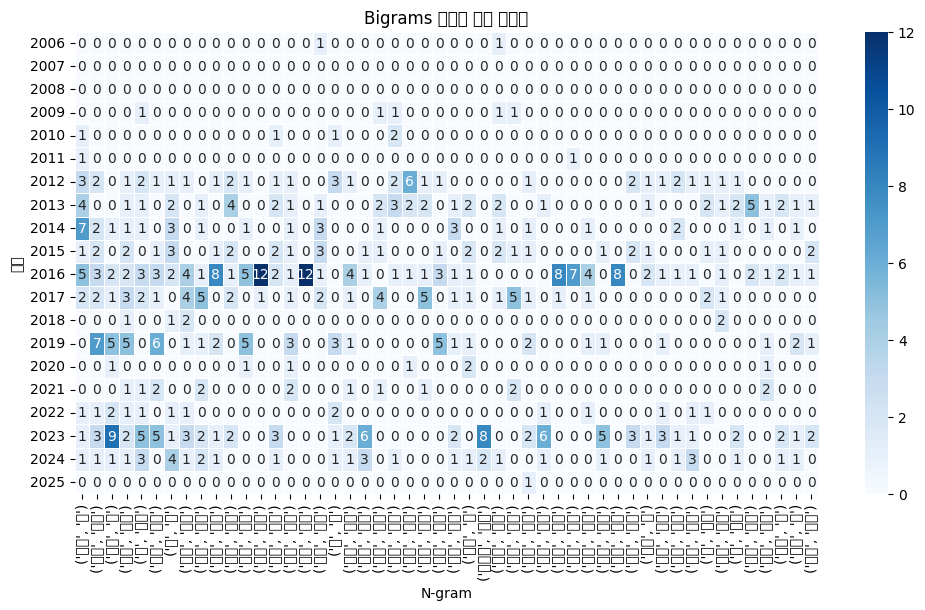

findfont: Font family 'Noto Sans CJK KR' not found.
findfont: Font family 'Noto Sans CJK KR' not found.
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 33832 (\N{CJK UNIFIED IDEOGRAPH-8428}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.

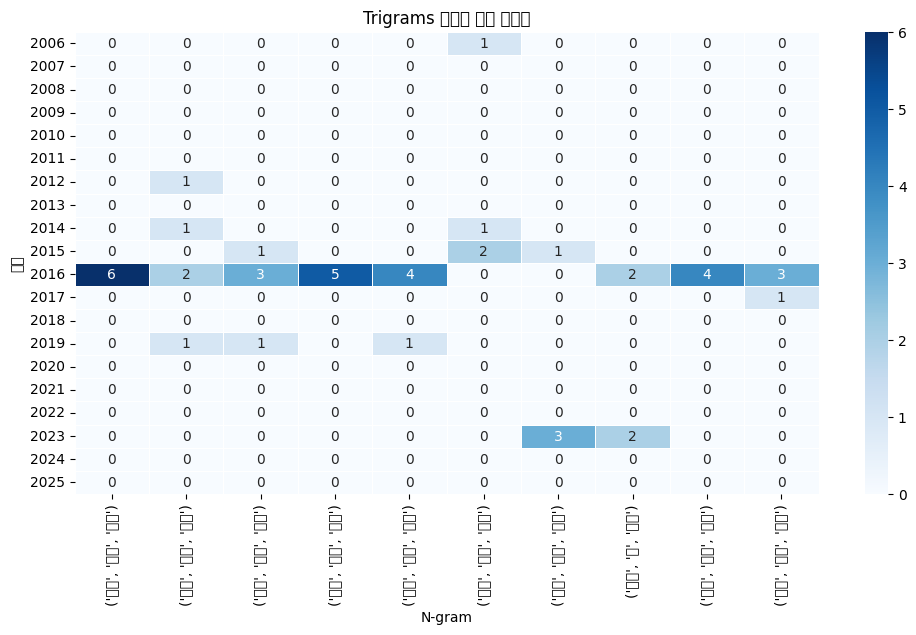

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# 🔹 1. 정확한 'Noto Sans CJK KR' 폰트 경로 확인
font_path = "/Users/gangjisu/Library/Fonts/NotoSansCJK.ttc"
font_prop = fm.FontProperties(fname=font_path)

# 🔹 2. Matplotlib에서 기본 폰트로 설정
plt.rcParams["font.family"] = "Noto Sans CJK KR"
plt.rcParams["axes.unicode_minus"] = False  # 음수 기호 깨짐 방지

def plot_ngram_heatmap(yearly_ngram_counts, ngram_type="bigrams", top_n=10):
    """연도별 N-gram 빈도를 히트맵으로 시각화"""
    years = sorted(yearly_ngram_counts.keys())

    # 가장 많이 등장한 N-gram 찾기
    all_ngrams = Counter()
    for year in years:
        all_ngrams.update(yearly_ngram_counts[year][ngram_type])

    top_ngrams = [ngram for ngram, _ in all_ngrams.most_common(top_n)]

    # 연도별 빈도를 DataFrame 형태로 변환
    data = []
    for year in years:
        row = [yearly_ngram_counts[year][ngram_type].get(ngram, 0) for ngram in top_ngrams]
        data.append(row)

    df = pd.DataFrame(data, columns=top_ngrams, index=years)

    plt.figure(figsize=(12, 6))
    sns.heatmap(df, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
    plt.xlabel("N-gram")
    plt.ylabel("연도")
    plt.title(f"{ngram_type.capitalize()} 연도별 빈도 히트맵")
    plt.show()

# 연도별 바이그램 히트맵
plot_ngram_heatmap(yearly_ngram_counts, ngram_type="bigrams", top_n=50)

# 연도별 트라이그램 히트맵
plot_ngram_heatmap(yearly_ngram_counts, ngram_type="trigrams", top_n=10)


In [30]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 🔹 정확한 'KR' 스타일을 명확하게 선택
font_path = "/Users/gangjisu/Library/Fonts/NotoSansCJK.ttc"  # 폰트 경로
font_prop = fm.FontProperties(fname=font_path, style="normal")

# 🔹 'KR' 스타일 강제 적용
plt.rcParams["font.family"] = "Noto Sans CJK KR"

# 🔹 음수 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 🔹 설정된 폰트 확인
print("현재 설정된 폰트:", plt.rcParams["font.family"])


현재 설정된 폰트: ['Noto Sans CJK KR']


In [33]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 🔹 정확한 KR 스타일 폰트 경로 확인 (fc-list 결과 기반)
font_path = "/Users/gangjisu/Library/Fonts/NotoSansCJK.ttc"  # 🔥 시스템에 설치된 폰트 경로

# 🔹 폰트 등록 (Matplotlib에서 찾을 수 있도록 강제 적용)
font_prop = fm.FontProperties(fname=font_path)

# 🔹 Matplotlib 기본 폰트로 설정
plt.rcParams["font.family"] = "Noto Sans CJK KR"

# 🔹 음수 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 🔹 설정된 폰트 확인
print("현재 설정된 폰트:", plt.rcParams["font.family"])


현재 설정된 폰트: ['Noto Sans CJK KR']


findfont: Font family 'Noto Sans CJK KR' not found.
findfont: Font family 'Noto Sans CJK KR' not found.
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26397 (\N{CJK UNIFIED IDEOGRAPH-671D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 40092 (\N{CJK UNIFIED IDEOGRAPH-9C9C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23548 (\N{CJK UNIFIED IDEOGRAPH-5BFC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24377 (\N{CJK UNIFIED IDEOGRAPH-5F39}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/gangjisu/IdeaProjects/sentiZh/venv/lib/python3.9/site-packages/seaborn/utils.

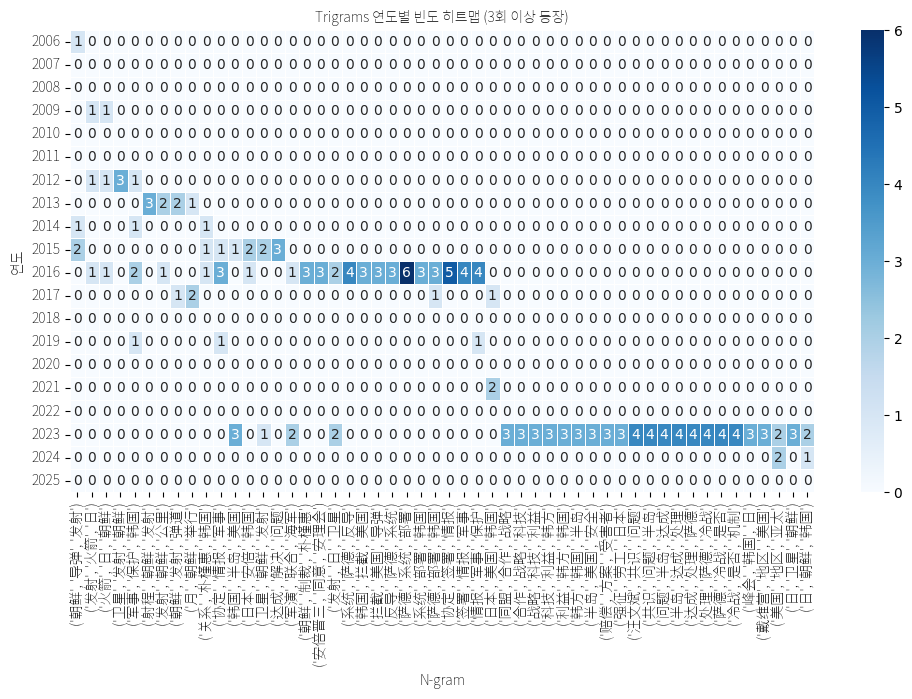

In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 🔹 1. 정확한 'Noto Sans CJK KR' 폰트 경로 확인
font_path = "/Users/gangjisu/Library/Fonts/NotoSansCJK.ttc"  
font_prop = fm.FontProperties(fname=font_path)

# 🔹 2. Matplotlib에서 기본 폰트로 설정
plt.rcParams["font.family"] = "Noto Sans CJK KR"
plt.rcParams["axes.unicode_minus"] = False  # 음수 기호 깨짐 방지

def plot_ngram_heatmap(yearly_ngram_counts, ngram_type="bigrams"):
    """연도별 N-gram 빈도를 히트맵으로 시각화 (3번 이상 등장한 것만)"""
    years = sorted(yearly_ngram_counts.keys())

   
    from collections import Counter
    all_ngrams = Counter()
    for year in years:
        all_ngrams.update(yearly_ngram_counts[year][ngram_type])

    filtered_ngrams = [ngram for ngram, freq in all_ngrams.items() if freq >= 3]  # 3번 이상 등장

    # 연도별 빈도를 DataFrame 형태로 변환
    data = []
    for year in years:
        row = [yearly_ngram_counts[year][ngram_type].get(ngram, 0) for ngram in filtered_ngrams]
        data.append(row)

    df = pd.DataFrame(data, columns=filtered_ngrams, index=years)

    # 🔹 3. 히트맵 생성 (폰트 적용)
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(df, annot=True, cmap="Blues", fmt="d", linewidths=0.5)

    # 🔥 폰트를 Seaborn에도 강제로 적용
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_prop)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)

    plt.xlabel("N-gram", fontproperties=font_prop)
    plt.ylabel("연도", fontproperties=font_prop)
    plt.title(f"{ngram_type.capitalize()} 연도별 빈도 히트맵 (3회 이상 등장)", fontproperties=font_prop)

    plt.show()

# 3번 이상 등장한 Trigram 시각화
plot_ngram_heatmap(yearly_ngram_counts, ngram_type="trigrams")


In [39]:
yearly_ngram_counts

{'2006': {'bigrams': Counter({('朝鲜', '导弹'): 1,
           ('导弹', '发射'): 1,
           ('发射', '制裁'): 1,
           ('制裁', '日本'): 1,
           ('日本', '安理会'): 1,
           ('安理会', '防御'): 1,
           ('防御', '系统'): 1,
           ('系统', '推动'): 1,
           ('推动', '太空'): 1}),
  'trigrams': Counter({('朝鲜', '导弹', '发射'): 1,
           ('导弹', '发射', '制裁'): 1,
           ('发射', '制裁', '日本'): 1,
           ('制裁', '日本', '安理会'): 1,
           ('日本', '安理会', '防御'): 1,
           ('安理会', '防御', '系统'): 1,
           ('防御', '系统', '推动'): 1,
           ('系统', '推动', '太空'): 1})},
 '2007': {'bigrams': Counter({('会谈', '朝鲜'): 1,
           ('朝鲜', '关系'): 1,
           ('关系', '美元'): 1,
           ('美元', '美国'): 1,
           ('美国', '谈判'): 1,
           ('谈判', '问题'): 1,
           ('问题', '国务卿'): 1,
           ('国务卿', '双方'): 1,
           ('双方', '双边'): 1}),
  'trigrams': Counter({('会谈', '朝鲜', '关系'): 1,
           ('朝鲜', '关系', '美元'): 1,
           ('关系', '美元', '美国'): 1,
           ('美元', '美国', '谈判'): 1,
           (